In [2]:
# Load essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Processing**
* **Load dataset**
* **Looking for missing values and duplicated values**
* **Removing duplicated values**
* **Transforming categorical to numeric**

In [109]:
# Load dataset
load_data = pd.read_csv('lungcancer.csv')
load_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [110]:
# Dataset information
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [111]:
# Look for missing values
load_data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### **No Missing Value**

In [112]:
# Look for duplicated values
load_data.duplicated().sum()

33

### **Found 33 duplicated value**

In [113]:
# Removing duplicated values
process_data = load_data.drop_duplicates()

In [114]:
# Remove trailing space from column names
process_data.columns = process_data.columns.str.strip()

In [115]:
# Summary of statistics
process_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


# **Exploratory Data Analysis (EDA)**
* **What gender that more affected in lung cancer?**
* **What most of ages that affected in lung cancer?**
* **Are smoking a reason of lung cancer?**
* **Can a smoking develop yellow fingers?**
* **Can consuming an alcohol develop a disease?**
* **Can a Lung Cancer developed an anxiety?**
* **Is it possible for people who smoke are cause by others?**
* **How many people who have a long lasting conditions or chronic disease?**
* **What are Symptoms caused by a Lung Cancer?**

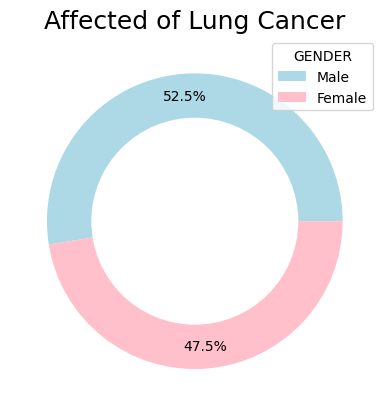

In [116]:
# Select only the gender that affected on lung cancer
male = process_data[(process_data['GENDER'] == 'M') & (process_data['LUNG_CANCER'] == 'YES')].shape[0]
female = process_data[(process_data['GENDER'] == 'F') & (process_data['LUNG_CANCER'] == 'YES')].shape[0]

# Donut chart
plt.pie([male, female], colors=['lightblue', 'pink'], pctdistance=0.85, autopct='%1.1f%%')
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

plt.title('Affected of Lung Cancer', size=18)
plt.legend(['Male', 'Female'], loc='upper right', title='GENDER')

plt.show()

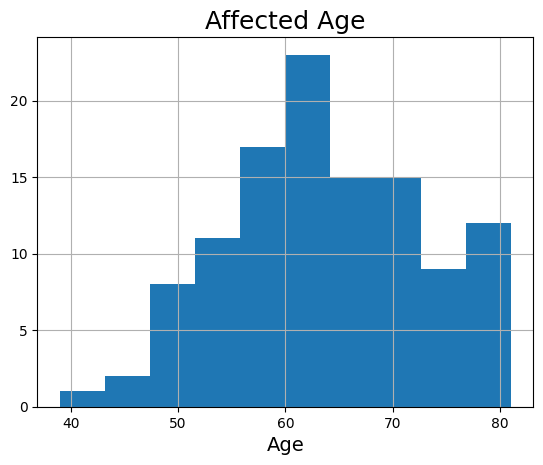

In [117]:
# Select only the affected age
age = process_data[(process_data['AGE']) & (process_data['LUNG_CANCER'] == 'YES')]

age = age.get('AGE')

# Histogram chart
plt.hist(age)
plt.title('Affected Age', size=18)
plt.xlabel('Age', size=14)

plt.grid(True)

plt.show()

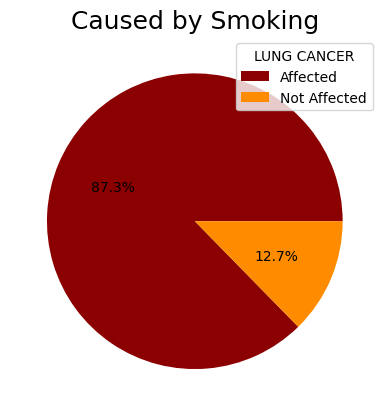

In [118]:
# Select only those affected & not affected of lung cancer who smoke
smoked_affected = process_data[(process_data['SMOKING'] == 2) & (process_data['LUNG_CANCER'] == 'YES')].shape[0]
smoked_not_affected = process_data[(process_data['SMOKING'] == 2) & (process_data['LUNG_CANCER'] == 'NO')].shape[0]

# Pie chart
plt.pie([smoked_affected, smoked_not_affected], colors=['darkred', 'darkorange'], autopct='%1.1f%%')

plt.title('Caused by Smoking', size=18)
plt.legend(['Affected', 'Not Affected'], loc='upper right', title='LUNG CANCER')

plt.show()

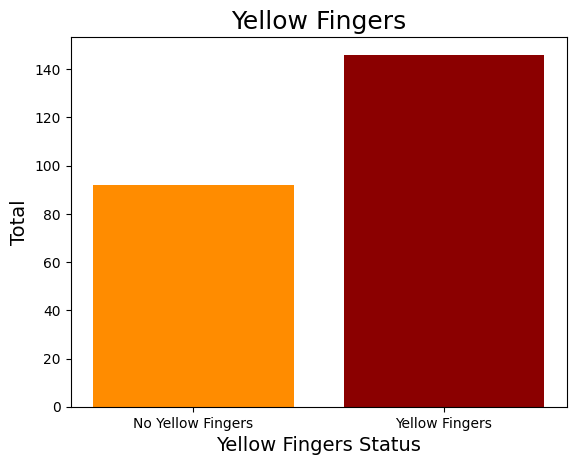

In [119]:
# Select the affected people who experience or not experience the yellow fingers
no_yellow_fingers = process_data[(process_data['YELLOW_FINGERS'] == 1) & (process_data['LUNG_CANCER'] == 'YES')].shape[0]
yellow_fingers = process_data[(process_data['YELLOW_FINGERS'] == 2) & (process_data['LUNG_CANCER'] == 'YES')].shape[0]

plt.bar(['No Yellow Fingers', 'Yellow Fingers'], [no_yellow_fingers, yellow_fingers], color=['darkorange', 'darkred'])

plt.title('Yellow Fingers', size=18)
plt.xlabel('Yellow Fingers Status', size=14)
plt.ylabel('Total', size=14)

plt.show()

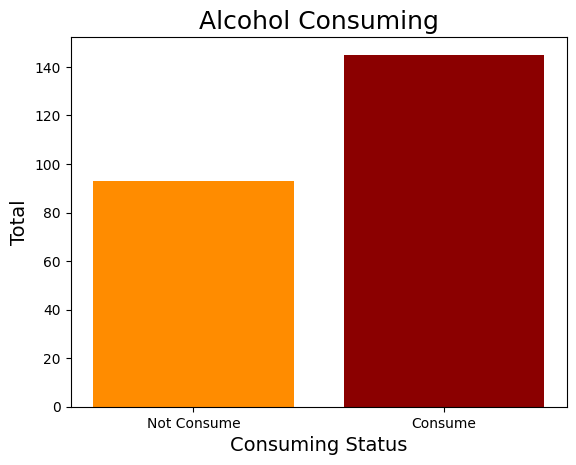

In [120]:
# Select the affected people who consume alcohol
no_consuming = process_data[(process_data['ALCOHOL CONSUMING'] == 1) & (process_data['LUNG_CANCER'] == 'YES')].shape[0]
consuming = process_data[(process_data['ALCOHOL CONSUMING'] == 2) & (process_data['LUNG_CANCER'] == 'YES')].shape[0]

plt.bar(['Not Consume', 'Consume'], [no_consuming, consuming], color=['darkorange', 'darkred'])

plt.title('Alcohol Consuming', size=18)
plt.xlabel('Consuming Status', size=14)
plt.ylabel('Total', size=14)

plt.show()

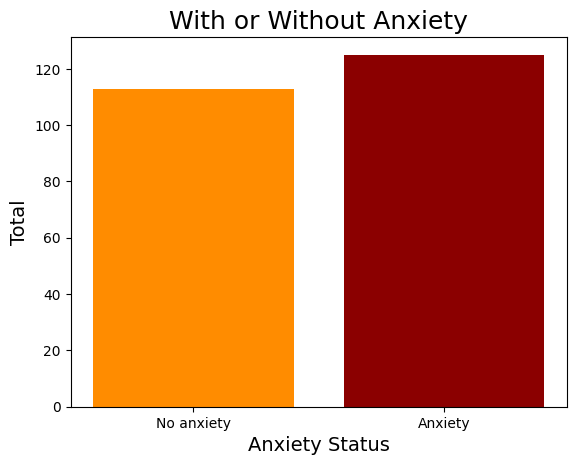

In [121]:
# Select the affected of lung cancer who developed or not developed the anxiety
no_anxiety = process_data[(process_data['ANXIETY'] == 1) & (process_data['LUNG_CANCER'] == 'YES')].shape[0]
anxiety = process_data[(process_data['ANXIETY'] == 2) & (process_data['LUNG_CANCER'] == 'YES')].shape[0]

# Bar chart
plt.bar(['No anxiety', 'Anxiety'], [no_anxiety, anxiety], color=['darkorange', 'darkred'])

plt.title('With or Without Anxiety', size=18)
plt.xlabel('Anxiety Status', size=14)
plt.ylabel('Total', size=14)

plt.show()

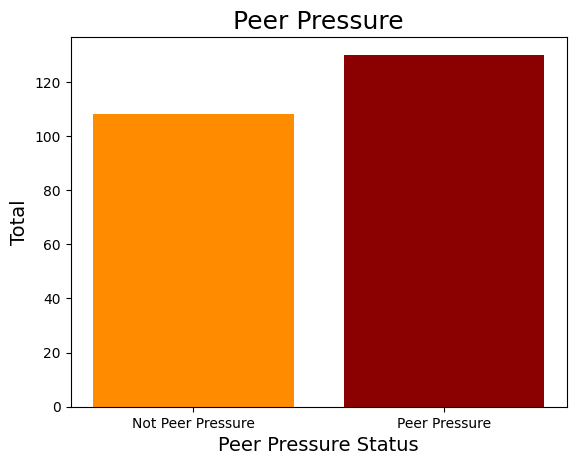

In [122]:
# Select the peer pressure 
not_peer_pressure = process_data[(process_data['PEER_PRESSURE'] == 1) & (process_data['LUNG_CANCER'] == 'YES')].shape[0]
peer_pressure = process_data[(process_data['PEER_PRESSURE'] == 2) & (process_data['LUNG_CANCER'] == 'YES')].shape[0]

plt.bar(['Not Peer Pressure', 'Peer Pressure'], [not_peer_pressure, peer_pressure], color=['darkorange', 'darkred'])

plt.title('Peer Pressure', size=18)
plt.xlabel('Peer Pressure Status', size=14)
plt.ylabel('Total', size=14)

plt.show()

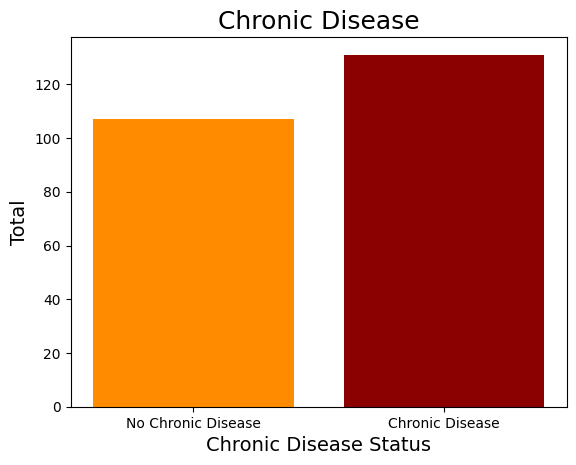

In [123]:
# Select the affected patients who have or dont have a chronic disease
no_chronic_disease = process_data[(process_data['CHRONIC DISEASE'] == 1) & (process_data['LUNG_CANCER'] == 'YES')].shape[0]
chronic_disease = process_data[(process_data['CHRONIC DISEASE'] == 2) & (process_data['LUNG_CANCER'] == 'YES')].shape[0]

plt.bar(['No Chronic Disease', 'Chronic Disease'], [no_chronic_disease, chronic_disease], color=['darkorange', 'darkred'])

plt.title('Chronic Disease', size=18)
plt.xlabel('Chronic Disease Status', size=14)
plt.ylabel('Total', size=14)

plt.show()

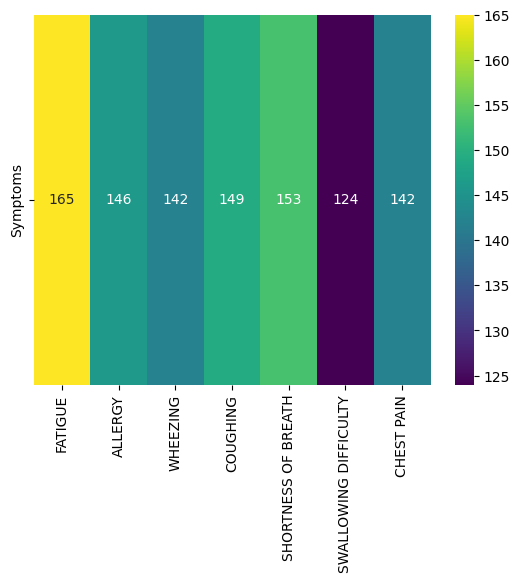

In [124]:
# Select the symptoms caused by a lung cancer
cancer = process_data[process_data['LUNG_CANCER'] == 'YES']
symptoms = ['FATIGUE', 'ALLERGY', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

data = [[(cancer[symptoms] == 2).sum() for symptoms in symptoms]]

# Heatmap
sns.heatmap(data, cmap='viridis', annot=True, fmt='d', xticklabels=symptoms, yticklabels=['Symptoms'])

plt.show()

# **Findings**
* **It stated that the male are more affected in lung cancer than female**
* **The people who age at 60s are most affected followed by people who age at 50s, 70s, 80s & 40s**
* **Smoking is the reason why the most of people have a lung cancer**
* **Some people who smoke develop the yellow fingers**
* **Its possible for drinkers to develop the disease**
* **Some people that affected in lung cancer developed the anxiety**
* **It stated that some people who smoke are cause by peer pressured on others**
* **Some people experience a long lasting conditions of lung cancer that may not have a cure**
* **People who have a lung cancer experince the Symptoms of fatigue, allergy, wheezing, coughing, shortness of breath, swallowing difficulty & chest pain**

# **Machine Learning**
##### **We will build a predictive model for classification**

In [125]:
# Load the first row
process_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [126]:
# Load essential libraries for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [127]:
# Select relevant feature
cause = process_data[['GENDER', 'AGE', 'SMOKING', 'FATIGUE', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'CHRONIC DISEASE']]
effect = process_data['LUNG_CANCER']

In [128]:
# Tranform the categorical gender into numeric
cause.loc[:, 'GENDER'] = cause['GENDER'].replace({'M':1, 'F':2})

In [129]:
# Classification algorithm
algorithm = {
    'logistic_regression': LogisticRegression(solver='liblinear'),
    'tree': DecisionTreeClassifier(),
    'ensemble': RandomForestClassifier(),
    'knn': KNeighborsClassifier(),
    'svm': SVC(kernel='linear', C=1.0)
}

encode_label = LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(cause, encode_label.fit_transform(effect), test_size=0.2, random_state=42)

accuracys = []
precisions = []
recalls = []
f1 = []
matrix = []

# Train model
def model():
    for name, models in algorithm.items():

        models.fit(X_train, y_train)
        predicted = models.predict(X_test)

        accuracys.append(float(f'{accuracy_score(y_test, predicted) * 100:.2f}'))
        precisions.append(float(f'{precision_score(y_test, predicted) * 100:.2f}'))
        recalls.append(float(f'{recall_score(y_test, predicted) * 100:.2f}'))
        f1.append(float(f'{f1_score(y_test, predicted) * 100:.2f}'))

        print(f'{name}:')
        print(confusion_matrix(y_test, predicted))

model()

logistic_regression:
[[ 1 11]
 [ 0 44]]
tree:
[[ 3  9]
 [ 0 44]]


ensemble:
[[ 3  9]
 [ 0 44]]
knn:
[[ 0 12]
 [ 0 44]]
svm:
[[ 1 11]
 [ 0 44]]


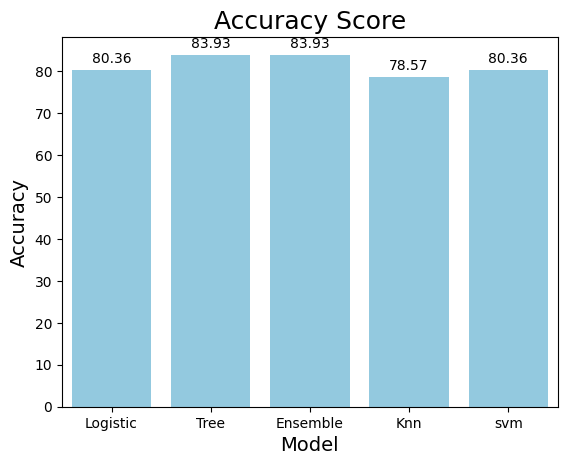

In [130]:
# Visualize the models accuracy
model_name = ['Logistic', 'Tree', 'Ensemble', 'Knn', 'svm']

# Bar chart
ax = sns.barplot(x=model_name, y=accuracys, color='skyblue')

# Annotate each bar with its accuracy score
for matrix, accuracy in enumerate(accuracys):
    ax.text(matrix, accuracy + 1, f'{accuracy:.2f}', ha='center', va='bottom')

plt.title('Accuracy Score', size=18)
plt.xlabel('Model', size=14)
plt.ylabel('Accuracy', size=14)

plt.show()

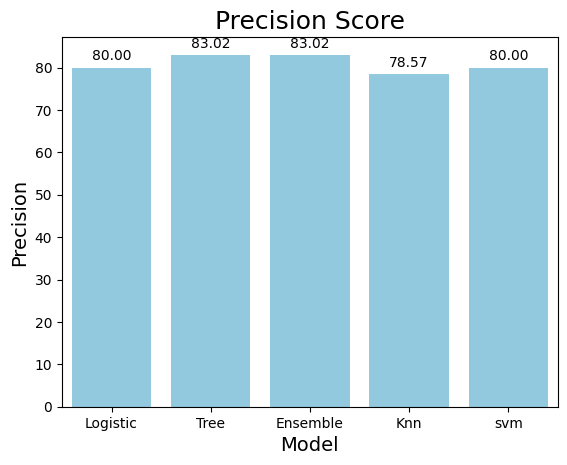

In [131]:
# Visualize the models precision
model_name = ['Logistic', 'Tree', 'Ensemble', 'Knn', 'svm']

# Bar chart
ax = sns.barplot(x=model_name, y=precisions, color='skyblue')

# Annotate each bar with its precision score
for matrix, precision in enumerate(precisions):
    ax.text(matrix, precision + 1, f'{precision:.2f}', ha='center', va='bottom')

plt.title('Precision Score', size=18)
plt.xlabel('Model', size=14)
plt.ylabel('Precision', size=14)

plt.show()

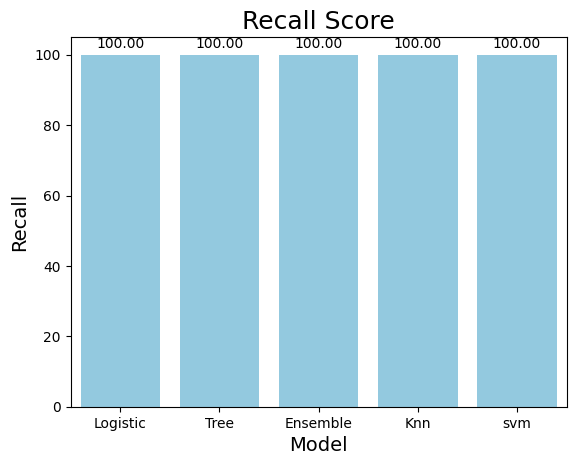

In [132]:
# Visualize the models recall
model_name = ['Logistic', 'Tree', 'Ensemble', 'Knn', 'svm']

# Bar chart
ax = sns.barplot(x=model_name, y=recalls, color='skyblue')

# Annotate each bar with its recall score
for matrix, recall in enumerate(recalls):
    ax.text(matrix, recall + 1, f'{recall:.2f}', ha='center', va='bottom')

plt.title('Recall Score', size=18)
plt.xlabel('Model', size=14)
plt.ylabel('Recall', size=14)

plt.show()

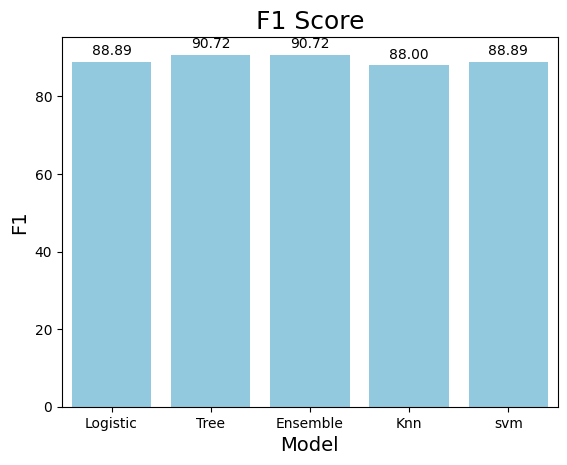

In [133]:
# Visualize the models f1
model_name = ['Logistic', 'Tree', 'Ensemble', 'Knn', 'svm']

# Bar chart
ax = sns.barplot(x=model_name, y=f1, color='skyblue')

# Annotate each bar with its f1 score
for matrix, f1 in enumerate(f1):
    ax.text(matrix, f1 + 1, f'{f1:.2f}', ha='center', va='bottom')

plt.title('F1 Score', size=18)
plt.xlabel('Model', size=14)
plt.ylabel('F1', size=14)

plt.show()